แบบฝึกหัดนี้ใช้ชุดข้อมูล Immunotherapy.csv ซึ่งเป็นข้อมูลผลของการรักษาโรคหูดชนิดหนึ่งโดยใช้วิธีภูมิคุ้มกันบำบัด รายละเอียดของชุดข้อมูลแสดงในภาพด้านล่าง

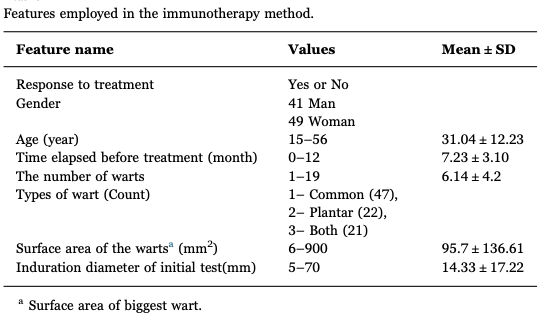

![warts](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/warts.png)

In [ ]:
#cell นี้สำหรับการใช้ใน Colab เท่านั้น
%pip install scikit_posthocs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scikit_posthocs as sp

In [ ]:
df_impt = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/Immunotherapy.csv")
df_impt.head()

,gender,age,time,number_of_warts,type,area,induration_diameter,response
0,Female,15,1.75,1,Plantar,49,7,No
1,Female,38,2.50,1,Both,43,50,Yes
2,Female,24,4.25,1,common,174,30,Yes
3,Female,34,8.50,1,Plantar,163,7,No
4,Female,53,10.00,1,Plantar,30,25,Yes


In [ ]:
df_impt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     object 
 1   age                  90 non-null     int64  
 2   time                 90 non-null     float64
 3   number_of_warts      90 non-null     int64  
 4   type                 90 non-null     object 
 5   area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   response             90 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 5.8+ KB


\
ให้นิสิตตอบคำถามพร้อมทั้งแสดงโค้ดที่ใช้ในการหาคำตอบ

1. แสดงวิธีการเพื่อให้ได้มาซึ่งกราฟด้านล่างนี้

item1.svg

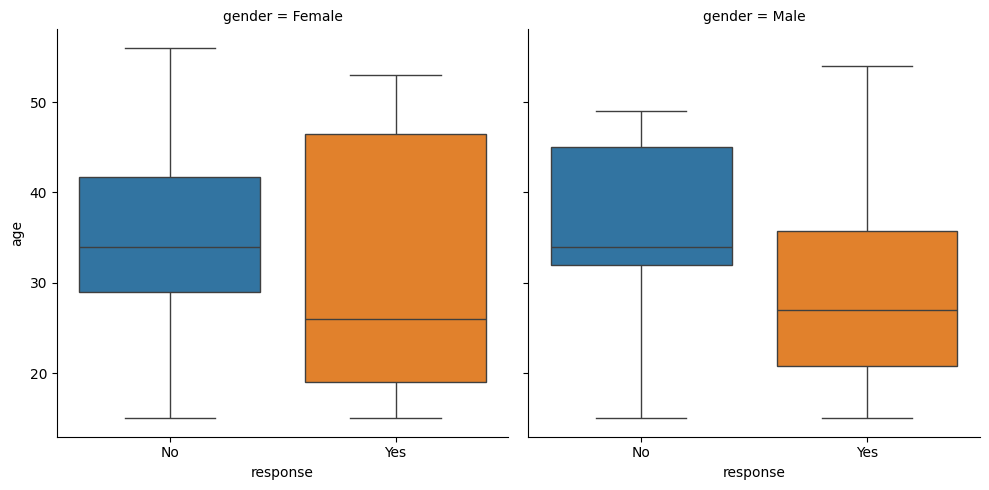

In [ ]:
# Your code
sns.catplot(data=df_impt,
            kind='box',
            x='response',
            y='age',
            col='gender',
            hue='response')

####  
2. แสดงวิธีการเพื่อให้ได้มาซึ่งกราฟด้านล่างนี้

item2.svg

<Axes: xlabel='gender', ylabel='age'>

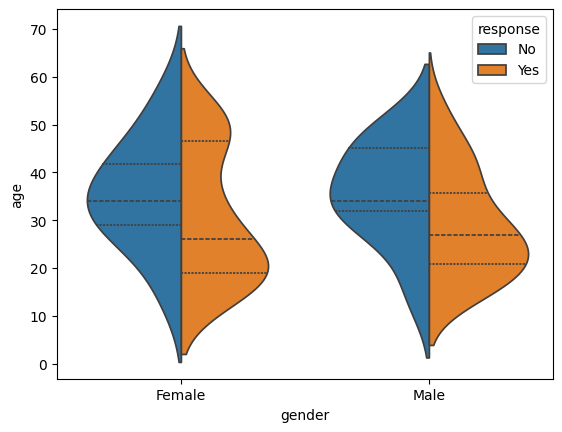

In [ ]:
#Your code
sns.violinplot(data=df_impt,
               x='gender',
               y='age',
               hue='response',
               inner='quartile',
               split=True)

ShapiroResult(statistic=np.float64(0.9293703357594011), pvalue=np.float64(0.00010961810788104843))

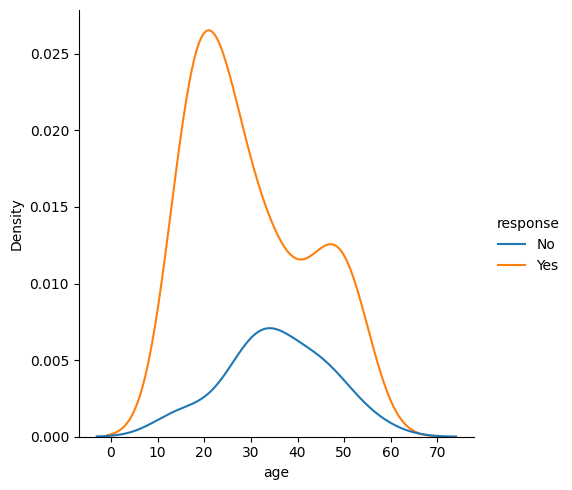

In [ ]:
sns.displot(data=df_impt, x='age', kind='kde', hue='response')
stats.shapiro(df_impt.age)

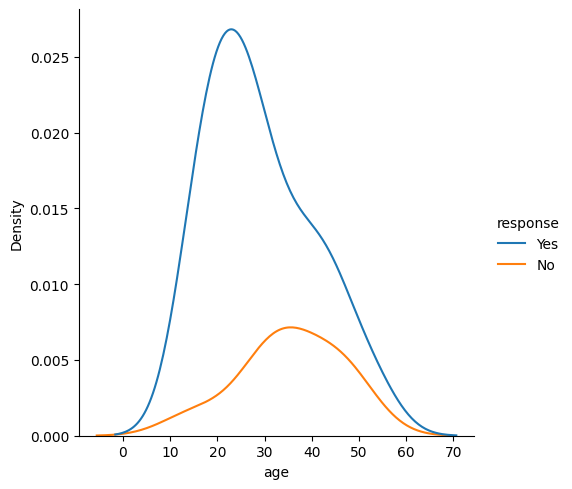

In [ ]:
sns.displot(data=df_impt.query('gender=="Male"'), x='age', kind='kde', hue='response')

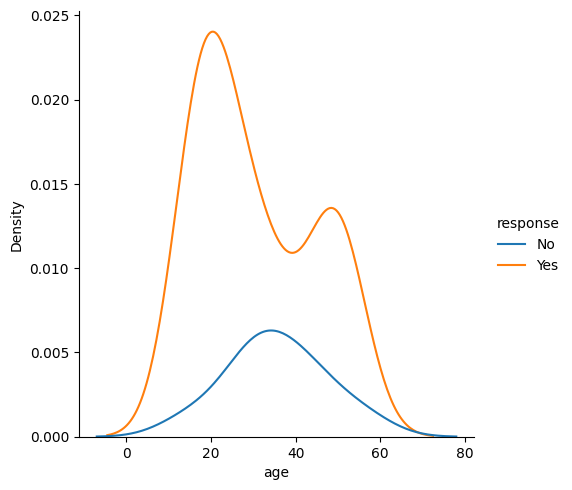

In [ ]:
sns.displot(data=df_impt.query('gender=="Female"'), x='age', kind='kde', hue='response')

####  
3. จากกราฟในข้อ 2 จงตอบคำถามต่อไปนี้
- การแจกแจงของกลุ่มตัวอย่างทั้ง 4 กลุ่ม Female-No, Female-Yes, Male-No และ Male-Yes เป็นการแจงแจกแบบปรกติหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร

<Axes: xlabel='gender', ylabel='age'>

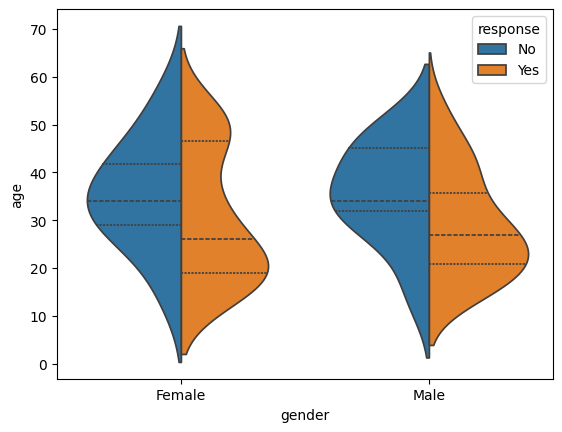

In [ ]:
sns.violinplot(data=df_impt,
               x='gender',
               y='age',
               hue='response',
               inner='quartile',
               split=True)

\
**Female**  
response=No : normal distribution

In [ ]:
stats.shapiro(df_impt.query('gender=="Female" & response=="No"').age)

ShapiroResult(statistic=np.float64(0.9869937751973278), pvalue=np.float64(0.9916383278405223))

H<sub>0</sub>: sample is normal distributed  
H<sub>A</sub>: sample is not normal distributed

\
response=Yes : non-normal distribution

In [ ]:
stats.shapiro(df_impt.query('gender=="Female" & response=="Yes"').age)

ShapiroResult(statistic=np.float64(0.8681075724353784), pvalue=np.float64(0.00030323194668538384))

\
**Male**  
response=No : normal distribution

In [ ]:
stats.shapiro(df_impt.query('gender=="Male" & response=="No"').age)

ShapiroResult(statistic=np.float64(0.9468334468117184), pvalue=np.float64(0.6553597771063071))

\
response=Yes : non-normal distribution (nearly normal)

In [ ]:
stats.shapiro(df_impt.query('gender=="Male" & response=="Yes"').age)

ShapiroResult(statistic=np.float64(0.9319163499754242), pvalue=np.float64(0.04429689619748405))

####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Female-No แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Female-Yes อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

\
**Female response=No vs. response=Yes**

***Hypothesis***  
H<sub>0</sub>: the actual difference between means is equal to 0  
H<sub>A</sub>: the actual difference between means is ***not*** equal to 0

In [ ]:
u_score, p_value = stats.mannwhitneyu(df_impt.query('gender=="Female" & response=="No"').age,
                                      df_impt.query('gender=="Female" & response=="Yes"').age,
                                      method="exact")
print("u-score:", u_score)
print("p-value", p_value)

u-score: 243.0
p-value 0.24283071084318192


p-value > 0.05, fail to reject H<sub>0</sub>

####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Male-No แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Male-Yes อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

\
**Male response=No vs. response=Yes**

***Hypothesis***  
H<sub>0</sub>: the actual difference between means is equal to 0  
H<sub>A</sub>: the actual difference between means is ***not*** equal to 0

In [ ]:
u_score, p_value = stats.mannwhitneyu(df_impt.query('gender=="Male" & response=="No"').age,
                                      df_impt.query('gender=="Male" & response=="Yes"').age,
                                      method="exact")
print("u-score:", u_score)
print("p-value", p_value)

u-score: 194.5
p-value 0.1203109753136182


p-value > 0.05, fail to reject H<sub>0</sub>

####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Female-No แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Male-No อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

\
**Female response=No vs. Male response=No**

***Hypothesis***  
H<sub>0</sub>: the actual difference between means is equal to 0  
H<sub>A</sub>: the actual difference between means is ***not*** equal to 0

In [ ]:
t_score, p_value = stats.ttest_ind(a=df_impt.query('gender=="Female" & response=="No"').age,
                                   b=df_impt.query('gender=="Male" & response=="No"').age,
                                   equal_var=True,
                                   alternative='two-sided')
print("t-score:", t_score)
print("p-value:", p_value)

t-score: 0.010851277467950823
p-value: 0.991468431339334


p-value > 0.05, fail to reject H<sub>0</sub>

####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Female-Yes แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Male-Yes อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

\
**Female response=Yes vs. Male response=Yes**

***Hypothesis***  
H<sub>0</sub>: the actual difference between means is equal to 0  
H<sub>A</sub>: the actual difference between means is ***not*** equal to 0

In [ ]:
u_score, p_value = stats.mannwhitneyu(df_impt.query('gender=="Female" & response=="Yes"').age,
                                      df_impt.query('gender=="Male" & response=="Yes"').age,
                                      method="exact")
print("u-score:", u_score)
print("p-value", p_value)

u-score: 639.0
p-value 0.8677696623734227


p-value > 0.05, fail to reject H<sub>0</sub>

####  
3. แสดงวิธีการเพื่อให้ได้มาซึ่งกราฟด้านล่างนี้

3.1

item3.1.svg

<Axes: xlabel='type', ylabel='time'>

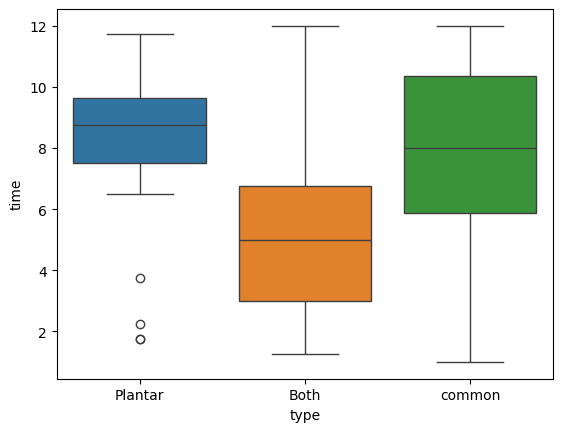

In [ ]:
#Your code
sns.boxplot(data=df_impt,
           x='type',
           y='time',
           hue='type')

\
3.2

item3.2.svg

<Axes: xlabel='type', ylabel='time'>

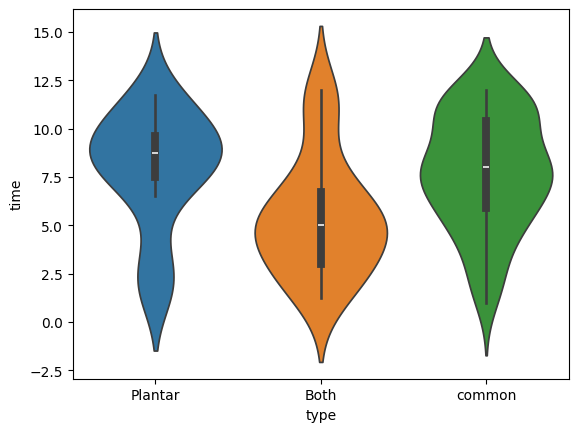

In [ ]:
#Your code
sns.violinplot(data=df_impt,
           x='type',
           y='time',
           hue='type')

\
3.3

item3.3.svg

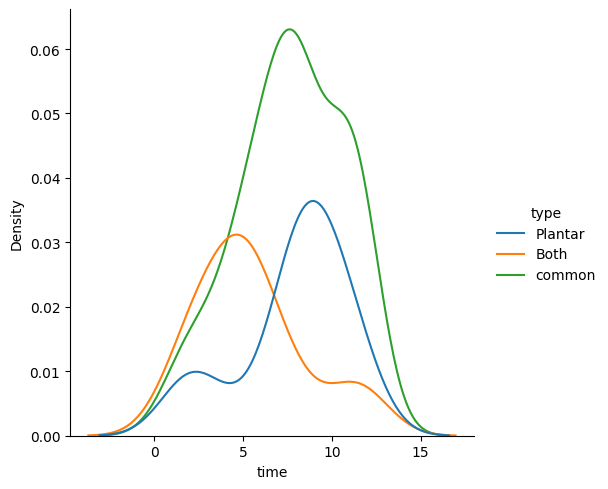

In [ ]:
#Your code
sns.displot(data=df_impt,
            x='time',
            kind='kde',
            hue='type')

\
4. จากกราฟข้อ 3.1, 3.2, 3.3 การแจกแจงของค่า time ในกลุ่มตัวอย่างแยกตาม type คือ Plantar, common, และ Both เป็นการแจงแจกแบบปรกติหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร

\
type=Plantar : non-normal distribution

In [ ]:
stats.shapiro(df_impt[df_impt.type=='Plantar'].time)

ShapiroResult(statistic=np.float64(0.8656671864195405), pvalue=np.float64(0.006508248593987505))

\
type=common : normal distribution (nearly non-normal)

In [ ]:
stats.shapiro(df_impt[df_impt.type=='common'].time)

ShapiroResult(statistic=np.float64(0.9553052494039019), pvalue=np.float64(0.07006982798579209))

\
type=Both : normal distribution (nearly non-normal)

In [ ]:
stats.shapiro(df_impt[df_impt.type=='Both'].time)

ShapiroResult(statistic=np.float64(0.9113236776210308), pvalue=np.float64(0.05831858830271402))

\
5. จากกราฟข้อ 3.1, 3.2, 3.3 ค่าเฉลี่ย time ในกลุ่มตัวอย่างแยกตาม type คือ Plantar, common, และ Both มีความแตกต่างกันอย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร โดยให้แสดงวิธีเปรียบเทียบแบบพร้อมกันทั้ง 3 กลุ่ม แล้วจึงแสดงวิธีการใช้ pos hoc test

\
Perform Kruskal–Wallis test

H<sub>0</sub>: there is no difference in the means.  
H<sub>A</sub>: there is difference in the means.

In [ ]:
f_score, p_value = stats.kruskal(df_impt[df_impt.type=='Plantar'].time,
                                 df_impt[df_impt.type=='common'].time,
                                 df_impt[df_impt.type=='Both'].time)
print("F-score:", f_score)
print("p-value:", p_value)

F-score: 9.461481927281019
p-value: 0.008819933367999914


p-value < 0.05, reject H<sub>0</sub> and accept H<sub>A</sub>

Perform pos hoc test

In [ ]:
sp.posthoc_conover(df_impt, val_col='time', group_col='type')

,Both,Plantar,common
Both,1.000000,0.005820,0.004522
Plantar,0.005820,1.000000,0.706786
common,0.004522,0.706786,1.000000
